**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import data

### Network

In [2]:
FOLDER_ANT  = "KS91_K562_ASTARRseq_peak_macs_input"
FOLDER_LOOP = "hic_intact_deep"

In [3]:
fdiry = file.path(FD_RES, "results", "region", FOLDER_LOOP, "loop", FOLDER_ANT)
fname = "network_ocr_metric_node.csv"
fpath = file.path(fdiry, fname)

dat = read_csv(fpath)

dat_network_ocr_metric_node = dat
print(dim(dat))
head(dat)

Rows: 49673 Columns: 18
── Column specification ─────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): name, shared name
dbl (14): AverageShortestPathLength, BetweennessCentrality, ClosenessCentral...
lgl  (2): IsSingleNode, selected

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 49673    18


AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,IsSingleNode,name,NeighborhoodConnectivity,NumberOfDirectedEdges,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,Radiality,selected,SelfLoops,shared name,Stress,TopologicalCoefficient
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<dbl>
10.48712,4.919747e-01,0.09535502,0.1000000,5,19,FALSE,chr10:100045961-100046653,3.80,0,5,0,0.3675250,FALSE,0,chr10:100045961-100046653,839830,0.2285714
10.86052,2.724630e-02,0.09207666,0.1666667,4,20,FALSE,chr10:100433434-100434444,4.50,0,4,0,0.3426323,FALSE,0,chr10:100433434-100434444,33716,0.3333333
11.78541,4.614888e-05,0.08485069,0.3333333,3,26,FALSE,chr10:100185017-100187275,3.00,0,3,0,0.2809728,FALSE,0,chr10:100185017-100187275,12,0.5333333
11.78112,1.282016e-02,0.08488160,0.3333333,3,26,FALSE,chr10:100267066-100268374,3.00,0,3,0,0.2812589,FALSE,0,chr10:100267066-100268374,7662,0.4444444
10.81330,2.118233e-03,0.09247867,0.0000000,2,25,FALSE,chr10:100370571-100371646,7.50,0,2,0,0.3457797,FALSE,0,chr10:100370571-100371646,2546,0.5416667
10.80043,2.335595e-02,0.09258891,0.1666667,4,25,FALSE,chr10:100373060-100374238,4.75,0,4,0,0.3466381,FALSE,0,chr10:100373060-100374238,15290,0.3035714


### ASTARR/WSTARR/TMPRA

In [4]:
### init
ASSAYS = c("KS91_K562_ASTARRseq", "A001_K562_WSTARRseq", "Tewhey_K562_TileMPRA")
LABELS = c("ASTARR", "WSTARR", "TMPRA")
FOLDER = "coverage_astarrseq_peak_macs_input"

fnames = c(
    "result.Log2FC.raw.deseq.WGS.tsv",
    "result.Log2FC.raw.deseq.WGS.tsv",
    "result.Log2FC.raw.deseq.Merge.tsv"
)
names(fnames) = ASSAYS

### loop and import data
lst = lapply(ASSAYS, function(ASSAY){
    
    ### set file directories
    fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
    fname = fnames[ASSAY]
    fpath = file.path(fdiry, fname)

    ### read data
    dat = read_tsv(fpath, show_col_types = FALSE)
    return(dat)
})

names(lst) = LABELS
dat = bind_rows(lst, .id = "Assay")

### assign and show
dat_peak_score_deseq_starrmpra = dat
print(dim(dat))
head(dat)

[1] 495260      9


Assay,Peak,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Dataset
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ASTARR,chr1:100006256-100006880,74.39238,-0.01311792,0.15512423,-0.08456397,9.326080e-01,0.9510236543,NA
ASTARR,chr1:100010437-100010915,48.25931,-0.80687947,0.22174651,-3.63874709,2.739677e-04,0.0008947519,NA
ASTARR,chr1:10002087-10003910,224.35927,-0.34892859,0.09743886,-3.58100041,3.422811e-04,0.0010926173,NA
ASTARR,chr1:100021298-100021629,38.13434,-1.03799571,0.25401013,-4.08643436,4.380534e-05,0.0001707736,NA
ASTARR,chr1:100023727-100023976,32.62049,-0.19100207,0.25625467,-0.74536036,4.560539e-01,0.5497617125,NA
ASTARR,chr1:100027983-100029702,290.98442,-0.18001582,0.09610434,-1.87312902,6.105057e-02,0.1032752224,NA


### LMPRA

In [5]:
ASSAY   = "LentiMPRA_K562_Nadav"
FOLDER  = "coverage_astarrseq_peak_macs_input"

fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "results.summary.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_score_summary_lmpra = dat
print(dim(dat))
head(dat)

[1] 37180     7


Peak,Mean,Median,Max,Min,Count,Mean_Pos
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr10:100045961-100046653,0.065811,0.065811,0.065811,0.065811,200,0.065811
chr10:100228452-100230090,2.158430,2.158430,2.158430,2.158430,200,2.158430
chr10:100267066-100268374,1.338820,1.338820,1.338820,1.338820,200,1.338820
chr10:100285974-100287341,1.322260,1.322260,1.322260,1.322260,200,1.322260
chr10:100289686-100290090,0.548885,0.548885,0.548885,0.548885,200,0.548885
chr10:100342247-100342824,0.176936,0.176936,0.176936,0.176936,200,0.176936


### CRISPRi-Growth

In [6]:
ASSAY   = "CRISPRi_Growth_K562_Gersbach"
FOLDER  = "coverage_astarrseq_peak_macs_input"

fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "results.summary.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_score_summary_crispri_growth = dat
print(dim(dat))
head(dat)

[1] 80288     8


Peak,Mean,Median,Max,Min,Count,Mean_Neg,Mean_Pos
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr10:100009096-100010466,-0.03786170,0.0303830,0.526902,-0.655965,10,-0.3840866,0.3083632
chr10:100045961-100046653,0.10873570,0.1820295,0.646953,-0.497578,10,-0.2750008,0.3645600
chr10:100065094-100065486,-0.00323730,-0.0931995,1.305380,-0.677550,10,-0.3639722,0.5378650
chr10:100129051-100131059,-0.26576144,-0.2617330,0.253159,-0.767330,9,-0.4522120,0.1071397
chr10:100185017-100187275,-0.01202196,-0.0613300,0.730481,-0.954435,25,-0.2790666,0.3278531
chr10:100228452-100230090,-0.01822050,0.0722880,0.446912,-0.768059,10,-0.3293750,0.1892158


### CRISPRi-HCRFF

In [7]:
ASSAY   = "CRISPRi_FlowFISH"
FOLDER  = "coverage_astarrseq_peak_macs_input"

fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "results.summary.Merge.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_score_summary_crispri_hcrff = dat
print(dim(dat))
head(dat)

[1] 3084    9


Peak,Gene,Mean,Median,Max,Min,Count,Mean_Neg,Mean_Pos
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr11:33065336-33066228,CAPRIN1,-0.27343935,-0.2533300,1.82911,-2.32196,46,-0.5695431,0.4782085
chr11:33065336-33066228,CAT,-0.01256696,-0.1384765,1.43868,-1.77410,46,-0.5122241,0.6369873
chr11:33065336-33066228,LMO2,0.03675483,-0.0071000,1.09905,-1.14702,46,-0.4276747,0.5011843
chr11:33068519-33069100,CAPRIN1,-0.11785479,-0.0847600,1.64429,-2.01338,53,-0.4252182,0.4797963
chr11:33068519-33069100,CAT,-0.15932204,-0.1697360,2.12211,-2.59035,53,-0.6266582,0.6769637
chr11:33068519-33069100,LMO2,-0.08303026,-0.1090310,2.73010,-2.25265,53,-0.5389359,0.5116293


## Analysis

In [8]:
x = c(1,2,3,4,5,6)
cut_width(x, width=1)

[1] [0.5,1.5] (1.5,2.5] (2.5,3.5] (3.5,4.5] (4.5,5.5] (5.5,6.5]
Levels: [0.5,1.5] (1.5,2.5] (2.5,3.5] (3.5,4.5] (4.5,5.5] (5.5,6.5]

In [9]:
x = c(1,2,3,4,5,6)
cut_number(x, n=3)

[1] [1,2.67]    [1,2.67]    (2.67,4.33] (2.67,4.33] (4.33,6]    (4.33,6]   
Levels: [1,2.67] (2.67,4.33] (4.33,6]

In [10]:
dat = dat_network_ocr_metric_node
print(summary(dat$Degree))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   3.388   5.000  38.000 


In [11]:
dat = dat_network_ocr_metric_node
quantile(dat$Degree, probs = c(0.25, 0.5, 0.75))

25% 50% 75% 
  1   2   5

In [12]:
dat = dat_network_ocr_metric_node
quantile(dat$Degree, probs = c(0.2, 0.4, 0.6, 0.8))

20% 40% 60% 80% 
  1   2   3   5

In [13]:
dat = dat_network_ocr_metric_node
vec = c(0,1,2,3,5,40)
vec = cut(dat$Degree, breaks = vec)
table(vec)

vec
 (0,1]  (1,2]  (2,3]  (3,5] (5,40] 
 15197  10085   7009   8468   8914 

In [14]:
dat = dat_network_ocr_metric_node
print(summary(dat$BetweennessCentrality))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.001085 0.045834 0.021577 1.000000 


In [15]:
dat = dat_network_ocr_metric_node
quantile(dat$BetweennessCentrality, probs = c(0.2, 0.4, 0.6, 0.8))

20%          40%          60%          80% 
0.000000e+00 2.365302e-05 4.473405e-03 3.621308e-02

In [16]:
2.3653024469778e-05 * 100

[1] 0.002365302

In [17]:
dat = dat_network_ocr_dat = dat_network_ocr_metric_node
vec = c(0, 0.001, 0.01, 0.05, 1)
vec = cut(dat$BetweennessCentrality, breaks = vec)
table(vec)

vec
   (0,0.001] (0.001,0.01]  (0.01,0.05]     (0.05,1] 
        6956         8813         7665         8539 

In [18]:
dat = dat_network_ocr_metric_node

vec = c(0,1,2,3,5,40)
txt = paste0("Q", 1:(length(vec)-1))
dat = dat %>% 
    dplyr::mutate(Peak = name) %>%
    dplyr::select(Peak, Degree, BetweennessCentrality) %>%
    dplyr::mutate(Group=cut(Degree, breaks = vec, labels = txt))

dat_node = dat
print(table(dat$Group))
print(dim(dat))
head(dat)


   Q1    Q2    Q3    Q4    Q5 
15197 10085  7009  8468  8914 
[1] 49673     4


Peak,Degree,BetweennessCentrality,Group
<chr>,<dbl>,<dbl>,<fct>
chr10:100045961-100046653,5,4.919747e-01,Q4
chr10:100433434-100434444,4,2.724630e-02,Q4
chr10:100185017-100187275,3,4.614888e-05,Q3
chr10:100267066-100268374,3,1.282016e-02,Q3
chr10:100370571-100371646,2,2.118233e-03,Q2
chr10:100373060-100374238,4,2.335595e-02,Q4


In [25]:
dat_score = dat_peak_score_deseq_starrmpra %>% 
    dplyr::filter(Assay=="ASTARR") %>%
    dplyr::mutate(Score = log2FoldChange) %>%
    dplyr::select(Peak, Score)

dat = dat_node %>% 
    dplyr::left_join(dat_score, by="Peak") %>%
    na.omit()

print(dim(dat))
head(dat)

[1] 49673     5


Peak,Degree,BetweennessCentrality,Group,Score
<chr>,<dbl>,<dbl>,<fct>,<dbl>
chr10:100045961-100046653,5,4.919747e-01,Q4,-0.3578426
chr10:100433434-100434444,4,2.724630e-02,Q4,0.2022724
chr10:100185017-100187275,3,4.614888e-05,Q3,0.5285143
chr10:100267066-100268374,3,1.282016e-02,Q3,0.5337811
chr10:100370571-100371646,2,2.118233e-03,Q2,0.2682377
chr10:100373060-100374238,4,2.335595e-02,Q4,0.8575862


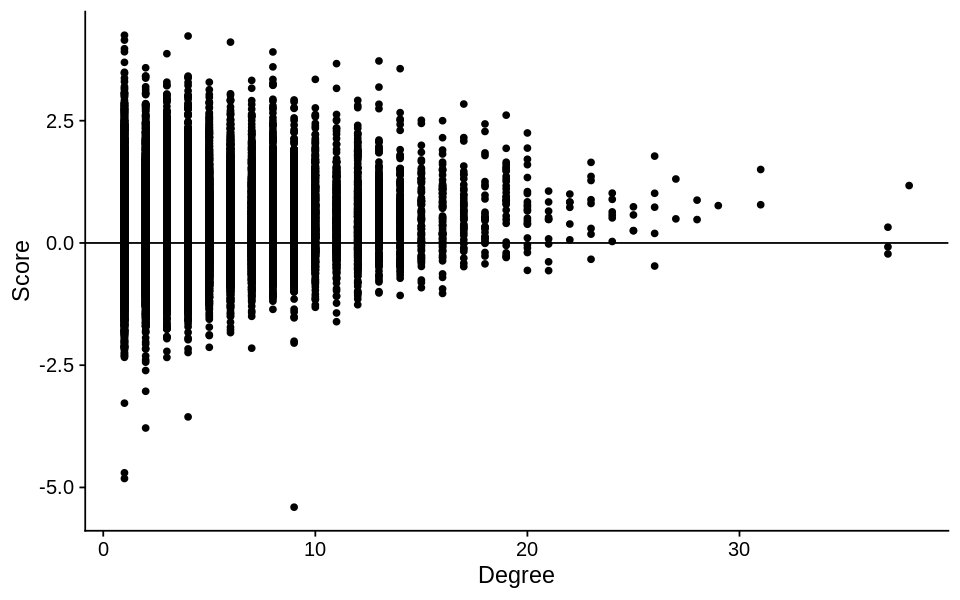

In [26]:
gpt = ggplot(dat, aes(x=Degree, y=Score)) + 
    geom_point() + 
    geom_hline(yintercept = 0) +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

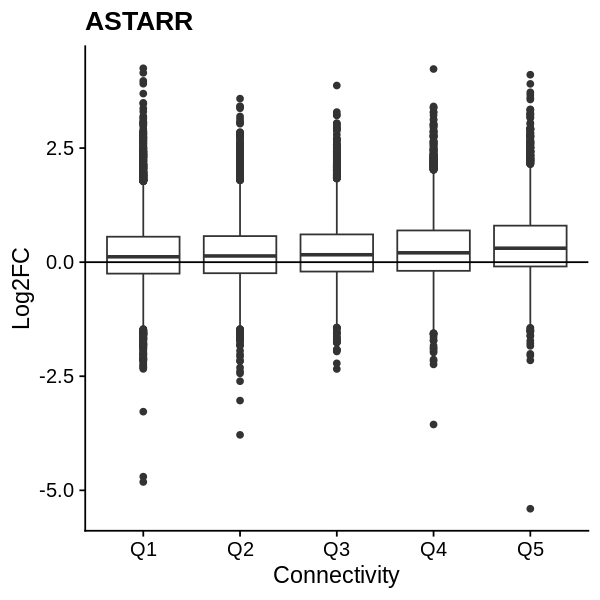

In [29]:
gpt = ggplot(dat, aes(x=Group, y=Score)) + 
    geom_boxplot() + 
    geom_hline(yintercept = 0) +
    labs(
        x = "Connectivity",
        y = "Log2FC",
        title = "ASTARR"
    ) +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

In [30]:
dat_score = dat_peak_score_deseq_starrmpra %>% 
    dplyr::filter(Assay=="WSTARR") %>%
    dplyr::mutate(Score = log2FoldChange) %>%
    dplyr::select(Peak, Score)

dat = dat_node %>% 
    dplyr::left_join(dat_score, by="Peak") %>%
    na.omit()

print(dim(dat))
head(dat)

[1] 49664     5


Peak,Degree,BetweennessCentrality,Group,Score
<chr>,<dbl>,<dbl>,<fct>,<dbl>
chr10:100045961-100046653,5,4.919747e-01,Q4,-0.293573031
chr10:100433434-100434444,4,2.724630e-02,Q4,-0.001685325
chr10:100185017-100187275,3,4.614888e-05,Q3,0.262190157
chr10:100267066-100268374,3,1.282016e-02,Q3,0.461165665
chr10:100370571-100371646,2,2.118233e-03,Q2,0.257714211
chr10:100373060-100374238,4,2.335595e-02,Q4,1.597732852


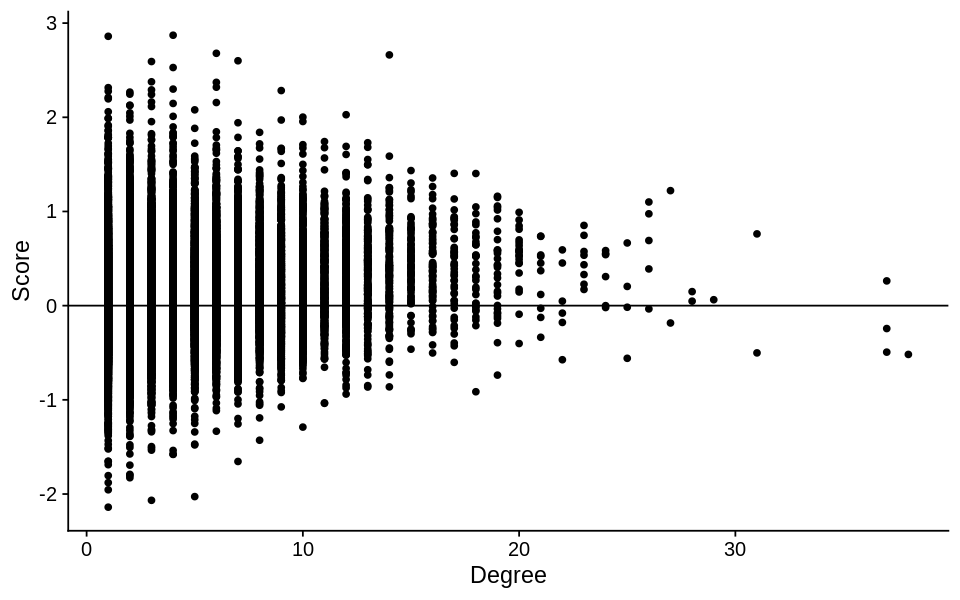

In [31]:
gpt = ggplot(dat, aes(x=Degree, y=Score)) + 
    geom_point() + 
    geom_hline(yintercept = 0) +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

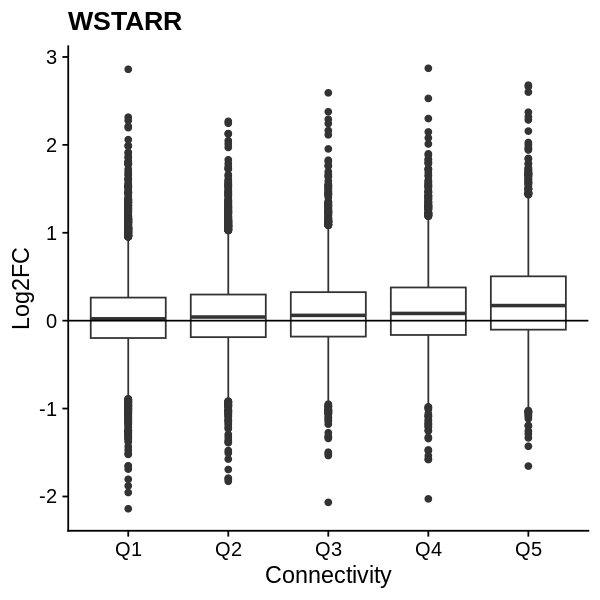

In [32]:
gpt = ggplot(dat, aes(x=Group, y=Score)) + 
    geom_boxplot() + 
    geom_hline(yintercept = 0) +
    labs(
        x = "Connectivity",
        y = "Log2FC",
        title = "WSTARR"
    ) +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

In [39]:
dat_score = dat_peak_score_deseq_starrmpra %>% 
    dplyr::filter(Assay=="TMPRA") %>%
    dplyr::mutate(Score = log2FoldChange) %>%
    dplyr::select(Peak, Score)

dat = dat_node %>% 
    dplyr::left_join(dat_score, by="Peak") %>%
    na.omit()

print(dim(dat))
head(dat)

[1] 423   5


Peak,Degree,BetweennessCentrality,Group,Score
<chr>,<dbl>,<dbl>,<fct>,<dbl>
chr11:33015389-33016533,2,6.493506e-03,Q2,1.6154604
chr11:33065336-33066228,7,3.596881e-03,Q5,-0.1510474
chr11:33068519-33069100,3,3.021641e-06,Q3,-0.5414250
chr11:33682287-33683069,2,5.309606e-05,Q2,0.8453394
chr11:33685020-33685711,7,8.533430e-03,Q5,-0.4406270
chr11:33687699-33688148,7,8.533430e-03,Q5,0.1558351


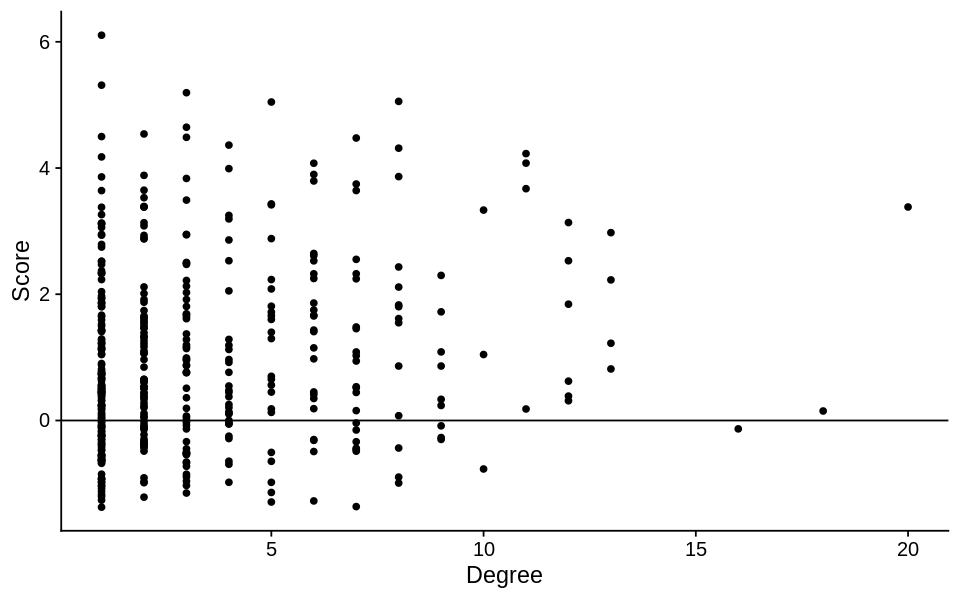

In [40]:
gpt = ggplot(dat, aes(x=Degree, y=Score)) + 
    geom_point() + 
    geom_hline(yintercept = 0) +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

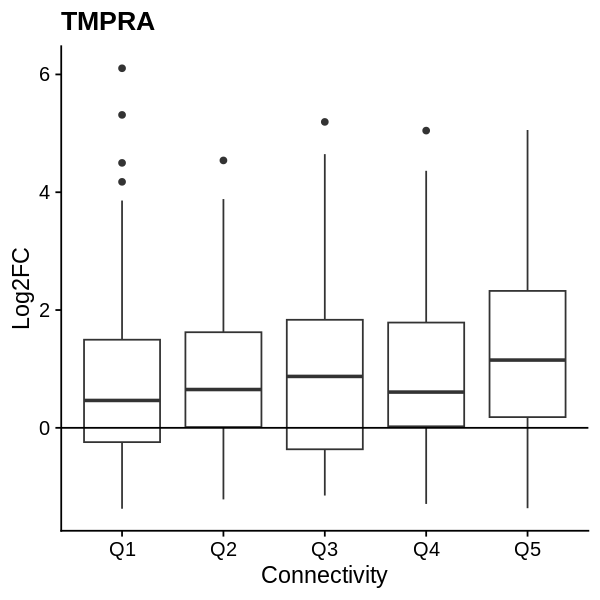

In [41]:
gpt = ggplot(dat, aes(x=Group, y=Score)) + 
    geom_boxplot() + 
    geom_hline(yintercept = 0) +
    labs(
        x = "Connectivity",
        y = "Log2FC",
        title = "TMPRA"
    ) +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

In [58]:
dat = dat_peak_score_summary_lmpra
head(dat)

Peak,Mean,Median,Max,Min,Count,Mean_Pos
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr10:100045961-100046653,0.065811,0.065811,0.065811,0.065811,200,0.065811
chr10:100228452-100230090,2.158430,2.158430,2.158430,2.158430,200,2.158430
chr10:100267066-100268374,1.338820,1.338820,1.338820,1.338820,200,1.338820
chr10:100285974-100287341,1.322260,1.322260,1.322260,1.322260,200,1.322260
chr10:100289686-100290090,0.548885,0.548885,0.548885,0.548885,200,0.548885
chr10:100342247-100342824,0.176936,0.176936,0.176936,0.176936,200,0.176936


In [59]:
dat_score = dat_peak_score_summary_lmpra %>%
    dplyr::mutate(Score = Mean) %>%
    dplyr::select(Peak, Score)

dat = dat_node %>% 
    dplyr::left_join(dat_score, by="Peak") %>%
    na.omit()

print(dim(dat))
head(dat)

[1] 17388     5


Peak,Degree,BetweennessCentrality,Group,Score
<chr>,<dbl>,<dbl>,<fct>,<dbl>
chr10:100045961-100046653,5,0.491974710,Q4,0.065811
chr10:100433434-100434444,4,0.027246297,Q4,0.088399
chr10:100267066-100268374,3,0.012820158,Q3,1.338820
chr10:100370571-100371646,2,0.002118233,Q2,0.249392
chr10:100373060-100374238,4,0.023355946,Q4,2.767325
chr10:100228452-100230090,2,0.004291845,Q2,2.158430


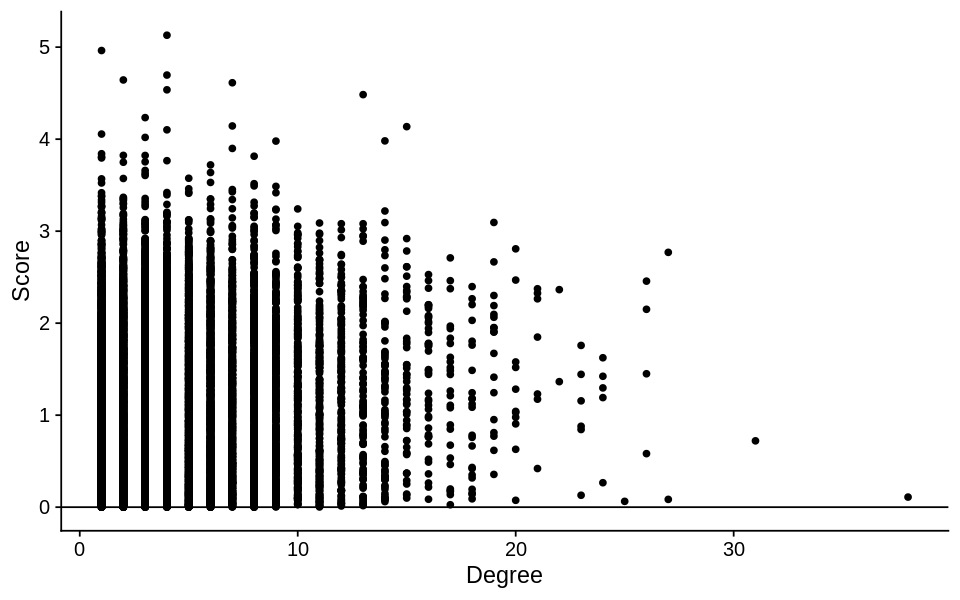

In [60]:
gpt = ggplot(dat, aes(x=Degree, y=Score)) + 
    geom_point() + 
    geom_hline(yintercept = 0) +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

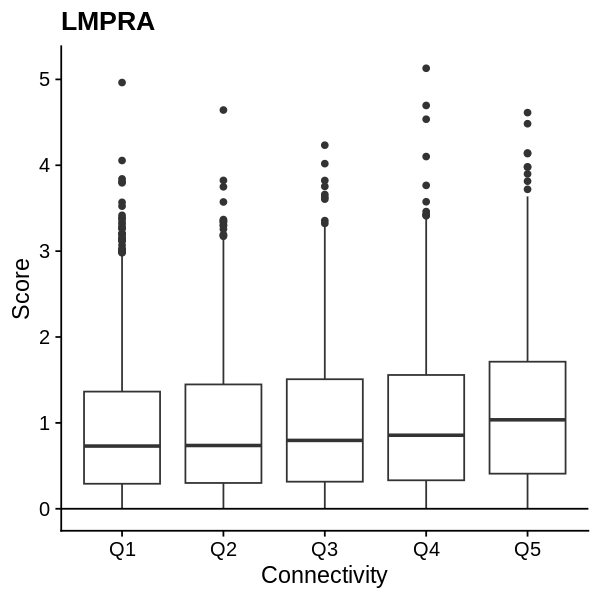

In [61]:
gpt = ggplot(dat, aes(x=Group, y=Score)) + 
    geom_boxplot() + 
    geom_hline(yintercept = 0) +
    labs(
        x = "Connectivity",
        y = "Score",
        title = "LMPRA"
    ) +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

In [62]:
dat = dat_peak_score_summary_crispri_growth
head(dat)

Peak,Mean,Median,Max,Min,Count,Mean_Neg,Mean_Pos
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr10:100009096-100010466,-0.03786170,0.0303830,0.526902,-0.655965,10,-0.3840866,0.3083632
chr10:100045961-100046653,0.10873570,0.1820295,0.646953,-0.497578,10,-0.2750008,0.3645600
chr10:100065094-100065486,-0.00323730,-0.0931995,1.305380,-0.677550,10,-0.3639722,0.5378650
chr10:100129051-100131059,-0.26576144,-0.2617330,0.253159,-0.767330,9,-0.4522120,0.1071397
chr10:100185017-100187275,-0.01202196,-0.0613300,0.730481,-0.954435,25,-0.2790666,0.3278531
chr10:100228452-100230090,-0.01822050,0.0722880,0.446912,-0.768059,10,-0.3293750,0.1892158


In [63]:
dat_score = dat_peak_score_summary_crispri_growth %>%
    dplyr::mutate(Score = Mean) %>%
    dplyr::select(Peak, Score)

dat = dat_node %>% 
    dplyr::left_join(dat_score, by="Peak") %>%
    na.omit()

print(dim(dat))
head(dat)

[1] 36348     5


Peak,Degree,BetweennessCentrality,Group,Score
<chr>,<dbl>,<dbl>,<fct>,<dbl>
chr10:100045961-100046653,5,4.919747e-01,Q4,0.10873570
chr10:100433434-100434444,4,2.724630e-02,Q4,0.05447410
chr10:100185017-100187275,3,4.614888e-05,Q3,-0.01202196
chr10:100267066-100268374,3,1.282016e-02,Q3,0.25902410
chr10:100370571-100371646,2,2.118233e-03,Q2,0.69053075
chr10:100373060-100374238,4,2.335595e-02,Q4,1.29425630


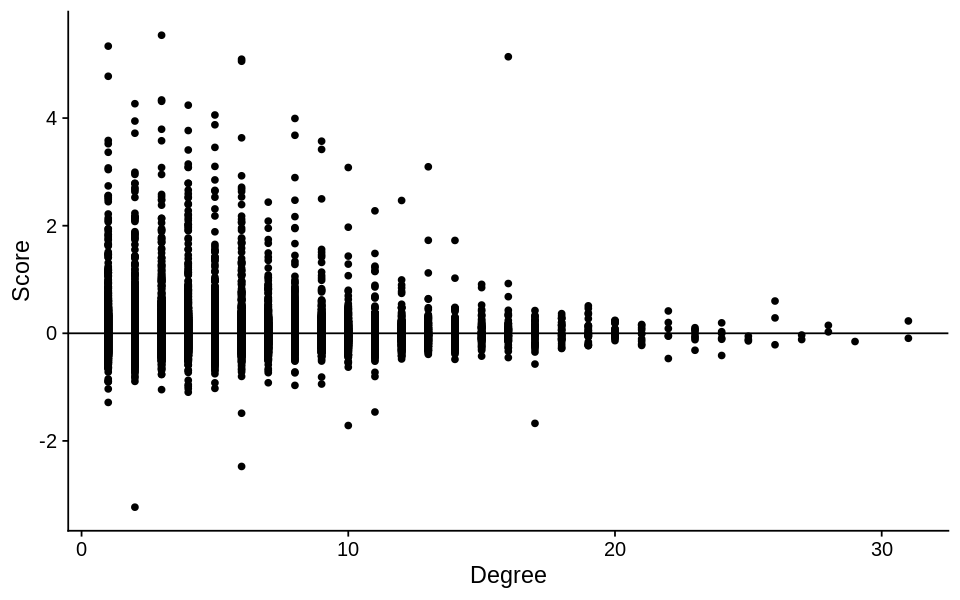

In [64]:
gpt = ggplot(dat, aes(x=Degree, y=Score)) + 
    geom_point() + 
    geom_hline(yintercept = 0) +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

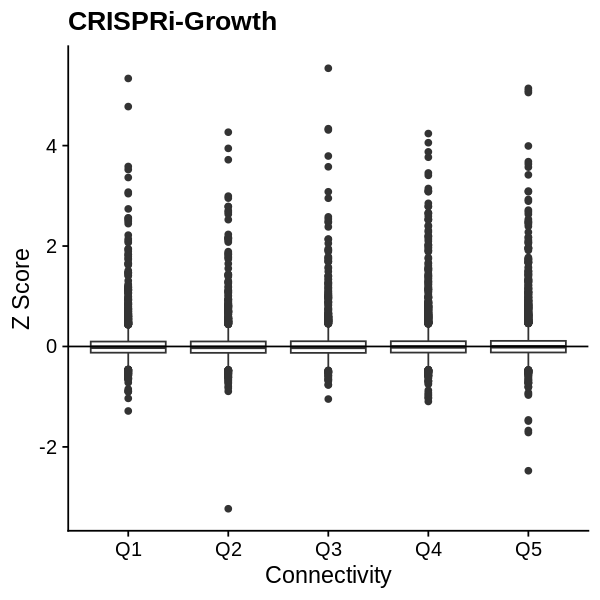

In [65]:
gpt = ggplot(dat, aes(x=Group, y=Score)) + 
    geom_boxplot() + 
    geom_hline(yintercept = 0) +
    labs(
        x = "Connectivity",
        y = "Z Score",
        title = "CRISPRi-Growth"
    ) +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

Warning message:
“Removed 161 rows containing non-finite values (`stat_boxplot()`).”


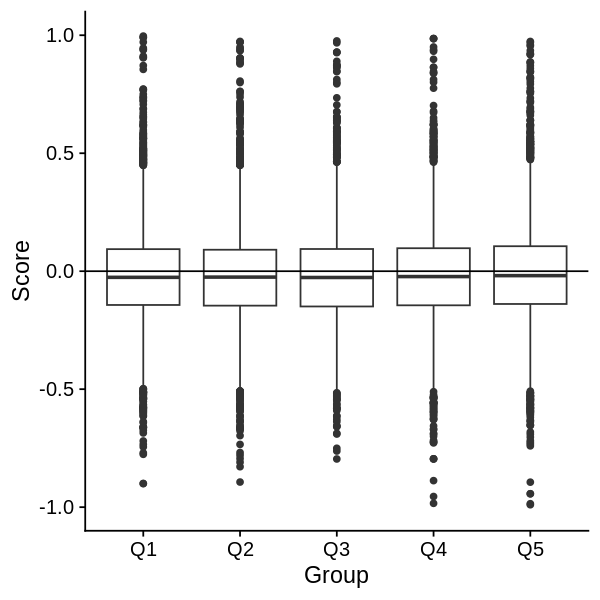

In [179]:
gpt = ggplot(dat, aes(x=Group, y=Score)) + 
    geom_boxplot() + 
    geom_hline(yintercept = 0) +
    ylim(c(-1, 1)) +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

In [69]:
dat_score = dat_peak_score_summary_crispri_hcrff
dat_score = dat_score %>%
    dplyr::mutate(Score = Mean) %>%
    dplyr::select(Peak, Score)

dat = dat_node %>% 
    dplyr::left_join(dat_score, by="Peak") %>%
    na.omit()

print(dim(dat))
head(dat)

[1] 1149    5


Peak,Degree,BetweennessCentrality,Group,Score
<chr>,<dbl>,<dbl>,<fct>,<dbl>
chr11:4092104-4092566,2,0.0000046548,Q2,-0.11635528
chr11:4092104-4092566,2,0.0000046548,Q2,-0.16674203
chr11:4092104-4092566,2,0.0000046548,Q2,-0.25223588
chr11:4092104-4092566,2,0.0000046548,Q2,-0.04147475
chr11:4092104-4092566,2,0.0000046548,Q2,-0.09339174
chr11:4094204-4095676,4,0.0171622477,Q4,-0.22842143


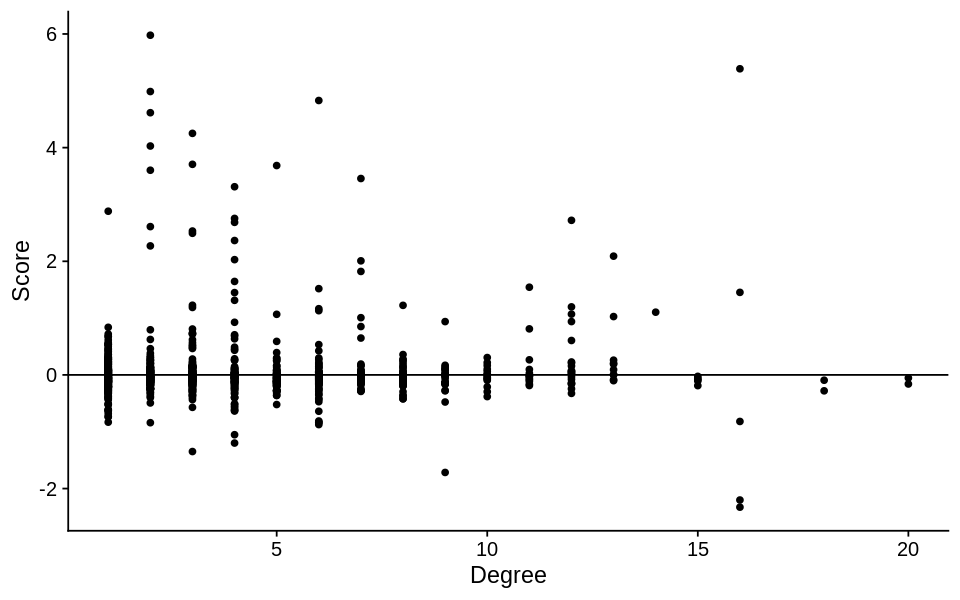

In [70]:
gpt = ggplot(dat, aes(x=Degree, y=Score)) + 
    geom_point() + 
    geom_hline(yintercept = 0) +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

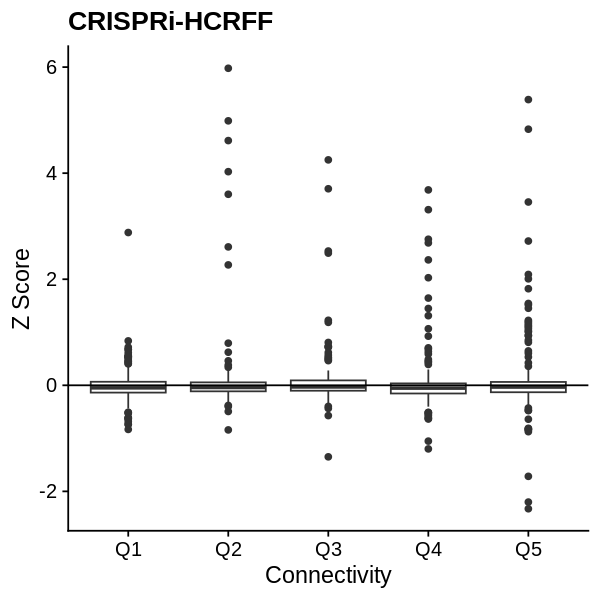

In [71]:
gpt = ggplot(dat, aes(x=Group, y=Score)) + 
    geom_boxplot() + 
    geom_hline(yintercept = 0) +
    labs(
        x = "Connectivity",
        y = "Z Score",
        title = "CRISPRi-HCRFF"
    ) +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

Warning message:
“Removed 48 rows containing non-finite values (`stat_boxplot()`).”


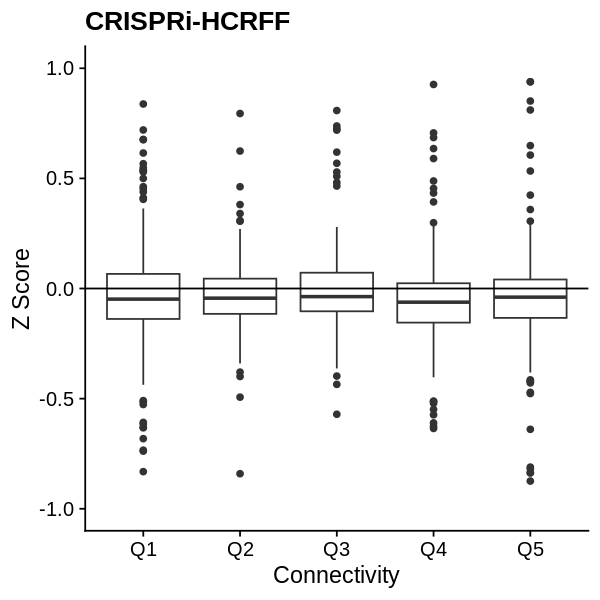

In [72]:
gpt = ggplot(dat, aes(x=Group, y=Score)) + 
    geom_boxplot() + 
    geom_hline(yintercept = 0) +
    labs(
        x = "Connectivity",
        y = "Z Score",
        title = "CRISPRi-HCRFF"
    ) +
    ylim(c(-1, 1)) +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)